In [2]:
what_were_covering = {1: "date prepare and load",
                     2: "build a model", 
                     3: "fitting the model to data (training)",
                     4: "making predictions and evaluating a model (inference)",
                     5: "saving and loading a model",
                     6: "putting it all together"}
what_were_covering

{1: 'date prepare and load',
 2: 'build a model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [3]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Data Preparing

In [4]:
# Create *known* parameters
weight = 0.7
bias = 0.3
#Create
start = 0 
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [5]:
# Split data into training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels=y_test, predictions = None):
    plt.figure(figsize=(10,10))
    plt.scatter(train_data,train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data,test_labels, c="g",s=4,label="Train Data")
    if predictions is not None:
        plt.scatter(test_data, predictions,c="r",s=4,label="Predictions")
    plt.legend()
    plt.show()

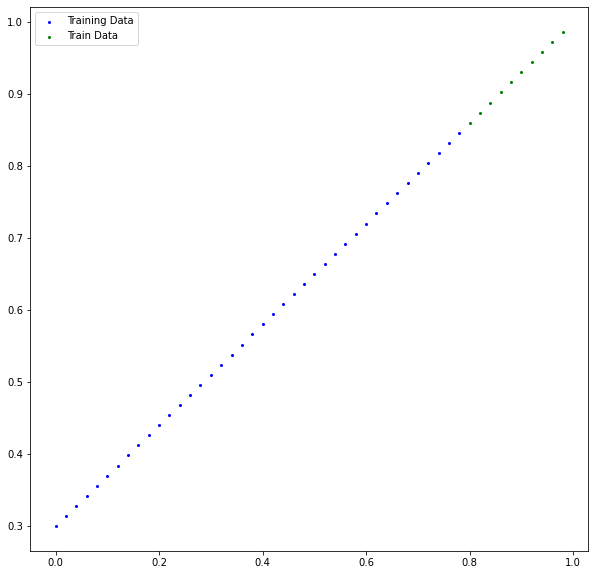

In [7]:
plot_predictions()

In [58]:
#Create linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.rand(1,requires_grad = True, dtype= torch.float))
        
        self.bias = nn.Parameter(torch.rand(1, requires_grad = True, dtype = torch.float))
        #Forward method to define the computation in the model
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
        
# torch.nn - contains all of the buildings for computational graphs 
# torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
# torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
# torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
# def forward() - All nn.Module subclasses require you to overwrite forward(), this module defines what happens in the forward computation.


In [59]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()


list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [38]:
#Making prediction using "torch.inference_mode()"
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds


tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [39]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

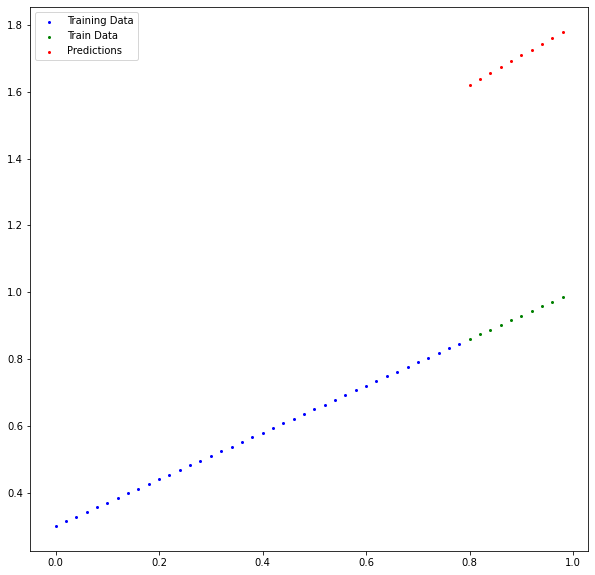

In [40]:
plot_predictions(predictions=y_preds)

# Train Model

In [60]:
# Setup a loss function

loss_fn = nn.L1Loss()
# Setup an optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) #SGD is Gradient Descent, lr is learning rate

In [61]:
#Building a training loop and testing loop
torch.manual_seed(42)

epochs = 100 # An epoch is one loop through the data

# 0. loop through the data
for epoch in range(epochs):
    #Set the model to training mode
    model_0.train() 
    
    # 1. Forward pass
    y_pred = model_0(X_train)
    
    # 2. Calculate loss
    loss = loss_fn(y_pred,y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the paramters of the model
    loss.backward()
    
    # 5. Step the optimizer(Perform gradient descent) 
    optimizer.step()
    
    ### Testing
    model_0.eval() # Turns off gradient tracking
    with torch.inference_mode():
        
        test_pred = model_0(X_test)
        
        #Calculate loss
        test_loss = loss_fn(test_pred,y_test)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss} ,Test loss: {test_loss}")

Epoch: 0, Loss: 0.6860889196395874 ,Test loss: 0.7637526988983154
Epoch: 10, Loss: 0.5708791017532349 ,Test loss: 0.6290428042411804
Epoch: 20, Loss: 0.45566922426223755 ,Test loss: 0.4943329691886902
Epoch: 30, Loss: 0.34045934677124023 ,Test loss: 0.35962313413619995
Epoch: 40, Loss: 0.2252494841814041 ,Test loss: 0.2249133139848709
Epoch: 50, Loss: 0.1100396141409874 ,Test loss: 0.09020347893238068
Epoch: 60, Loss: 0.009724985808134079 ,Test loss: 0.020998019725084305
Epoch: 70, Loss: 0.006216754671186209 ,Test loss: 0.014099234715104103
Epoch: 80, Loss: 0.002788322512060404 ,Test loss: 0.005826681852340698
Epoch: 90, Loss: 0.007095950655639172 ,Test loss: 0.00754010071977973


In [62]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [63]:
weight, bias

(0.7, 0.3)

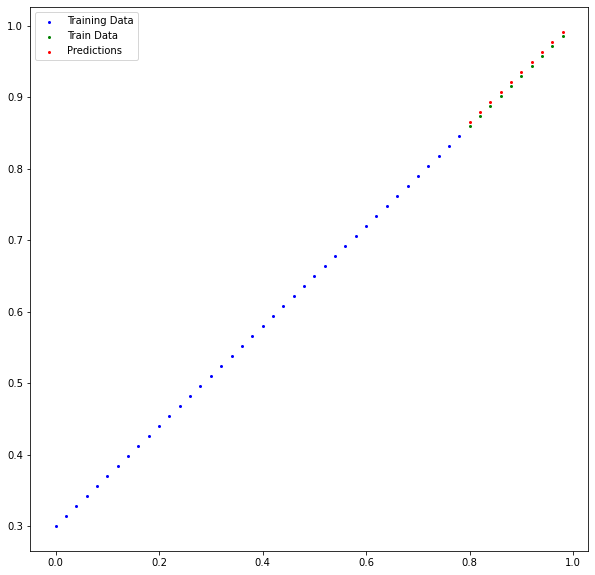

In [64]:
with torch.inference_mode():
    y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

# Saving a Model in PyTorch

In [65]:
from pathlib import Path

# 1.Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2.Create model save path
MODEL_NAME = "PyTorch_Workflow_LinearRegression.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

WindowsPath('models/PyTorch_Workflow_LinearRegression.pth')

In [66]:
# 3. Save the model state dict
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

# Loading a PyTorch Model

In [68]:
#To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict of model_0 (this will update new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])